In [30]:
## Model Building by using k selection
## final model is selected based on r correlatiom with r > 0.02
## Kaggle Competition Result: 0.87331
import pandas as pd
import numpy as np
# Loading data
test = pd.read_csv('credit_testing.csv')
print(test.shape)

train = pd.read_csv('credit_training.csv')
print(train.shape)

(300, 31)
(700, 32)


In [31]:
# This set of subset doesn't generate the best model
from sklearn.feature_selection import SelectKBest, chi2
X =train.drop(['OBS_ID','RESPONSE'], axis = 1)
y = train['RESPONSE']
#apply SelectKBest class to extract top 20 best features
bestfeatures = SelectKBest(chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(15,'Score'))  #print 10 best features

          Features         Score
9           AMOUNT  43927.244842
1         DURATION    266.446105
0         CHK_ACCT     84.763396
10        SAV_ACCT     57.457666
21             AGE     23.704816
2          HISTORY     18.396375
22   OTHER_INSTALL     11.888074
3          NEW_CAR      8.739258
11      EMPLOYMENT      8.222168
20  PROP_UNKN_NONE      7.245931
4         USED_CAR      6.273386
6         RADIO/TV      5.186550
19     REAL_ESTATE      4.174165
29         FOREIGN      3.702280
23            RENT      3.234385


In [32]:
# This is the best way to select subset variables to include in my final model.
corrs = abs(X.corrwith(train['RESPONSE']))
# Sort the correlations in descending order (highest to lowest)
sorted_correlations = corrs.sort_values(ascending=False)
sorted_correlations[sorted_correlations > 0.02]

CHK_ACCT           0.345339
DURATION           0.242796
HISTORY            0.236206
SAV_ACCT           0.190306
AMOUNT             0.166314
OTHER_INSTALL      0.145571
EMPLOYMENT         0.138765
NEW_CAR            0.127809
PROP_UNKN_NONE     0.110077
OWN_RES            0.108298
RADIO/TV           0.102053
USED_CAR           0.099006
AGE                0.097738
INSTALL_RATE       0.092493
REAL_ESTATE        0.090736
RENT               0.075000
FOREIGN            0.073950
EDUCATION          0.058525
MALE_MAR_or_WID    0.044331
MALE_SINGLE        0.038728
NUM_CREDITS        0.038664
TELEPHONE          0.034377
GUARANTOR          0.031700
CO-APPLICANT       0.028477
dtype: float64

In [34]:
# Eliminate value with p-value < 0.05. However, only 3 variables with p value < 0.05: DURATION, AGE, AMOUNT which reduce 
# the size of data and I got a lower value of accuracy number, around 77% when deploy models with those three variables.
# ---> This is not a  good technique to select variables for this project

import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.460946
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.262     
Dependent Variable: RESPONSE         AIC:              705.3238  
Date:               2023-11-19 19:31 BIC:              841.8562  
No. Observations:   700              Log-Likelihood:   -322.66   
Df Model:           29               LL-Null:          -437.29   
Df Residuals:       670              LLR p-value:      5.1200e-33
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
CHK_ACCT           0.5515   0.0861  6.4037 0.0000  0.3827  0.7203
DURATION          -0.0326   0.0112 -2.8969 0.0038 -0.0546 -0.0105


In [35]:

Y_train = train['RESPONSE']
X_train = train[['CHK_ACCT','DURATION','HISTORY','SAV_ACCT','AMOUNT','OTHER_INSTALL','EMPLOYMENT',
                 'NEW_CAR','PROP_UNKN_NONE','OWN_RES','RADIO/TV','USED_CAR','AGE','INSTALL_RATE',
                 'REAL_ESTATE' ,'RENT','FOREIGN','EDUCATION','MALE_MAR_or_WID','MALE_SINGLE','NUM_CREDITS','TELEPHONE',
                'GUARANTOR','CO-APPLICANT']]

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
xtrain, xtest, ytrain, ytest = train_test_split(X_train,Y_train,  train_size=0.8,test_size=0.2, random_state= 40)
scaler = StandardScaler()
xtrain = pd.DataFrame(scaler.fit_transform(xtrain), index = xtrain.index, columns=xtrain.columns)
print(xtrain)
xtest = pd.DataFrame(scaler.fit_transform(xtest), index = xtest.index, columns=xtest.columns)
print(xtest)

     CHK_ACCT  DURATION   HISTORY  SAV_ACCT    AMOUNT  OTHER_INSTALL  \
411 -0.422249 -0.769051  1.320684 -0.682092 -0.647569      -0.516690   
388 -1.215737  0.298943  1.320684  1.243815 -0.720143      -0.516690   
222  1.164727  0.298943 -0.498709  0.601846 -0.665618      -0.516690   
26  -0.422249  0.565942  1.320684  0.601846 -0.235438      -0.516690   
454  1.164727  0.031944 -0.498709  1.243815 -0.591916       1.935397   
..        ...       ...       ...       ...       ...            ...   
440  1.164727  0.120944 -0.498709  1.885785 -0.700589      -0.516690   
165 -0.422249  0.565942 -0.498709 -0.682092 -0.232430      -0.516690   
7    1.164727 -1.303049 -0.498709  1.243815 -0.602821      -0.516690   
219  1.164727  1.366938  0.410988  1.885785  2.181318       1.935397   
326 -1.215737 -0.769051  1.320684 -0.682092 -0.653209      -0.516690   

     EMPLOYMENT   NEW_CAR  PROP_UNKN_NONE   OWN_RES  ...  REAL_ESTATE  \
411    0.512682 -0.555348       -0.408248  0.607613  ...    -0

In [37]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=0.7,max_iter=1000)
model.fit(xtrain, ytrain)

LogisticRegression(C=0.7, max_iter=1000)

In [38]:
print(model.score(xtrain, ytrain))
print(model.score(xtest, ytest))

0.7767857142857143
0.8785714285714286


In [39]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
prediction = model.predict(xtest)
print(classification_report(ytest,prediction))
print(confusion_matrix(ytest,prediction))
print('precision: %.2f' % precision_score(ytest, prediction,average='weighted'))
print('recall: %.2f' % recall_score(ytest, prediction,average='weighted'))
print('f1_score: %.2f' % f1_score(ytest, prediction,average='weighted'))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78        39
           1       0.91      0.92      0.92       101

    accuracy                           0.88       140
   macro avg       0.85      0.85      0.85       140
weighted avg       0.88      0.88      0.88       140

[[30  9]
 [ 8 93]]
precision: 0.88
recall: 0.88
f1_score: 0.88


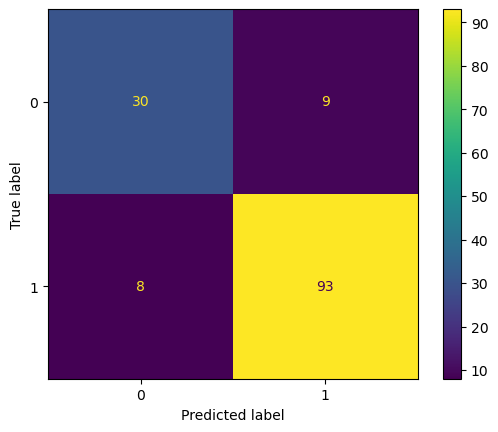

In [40]:
# Confusion Matrix for Logistics Regression Model
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams["axes.grid"] = False
from sklearn.metrics import ConfusionMatrixDisplay
matrix = confusion_matrix(ytest,prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix)

disp.plot()
plt.show()


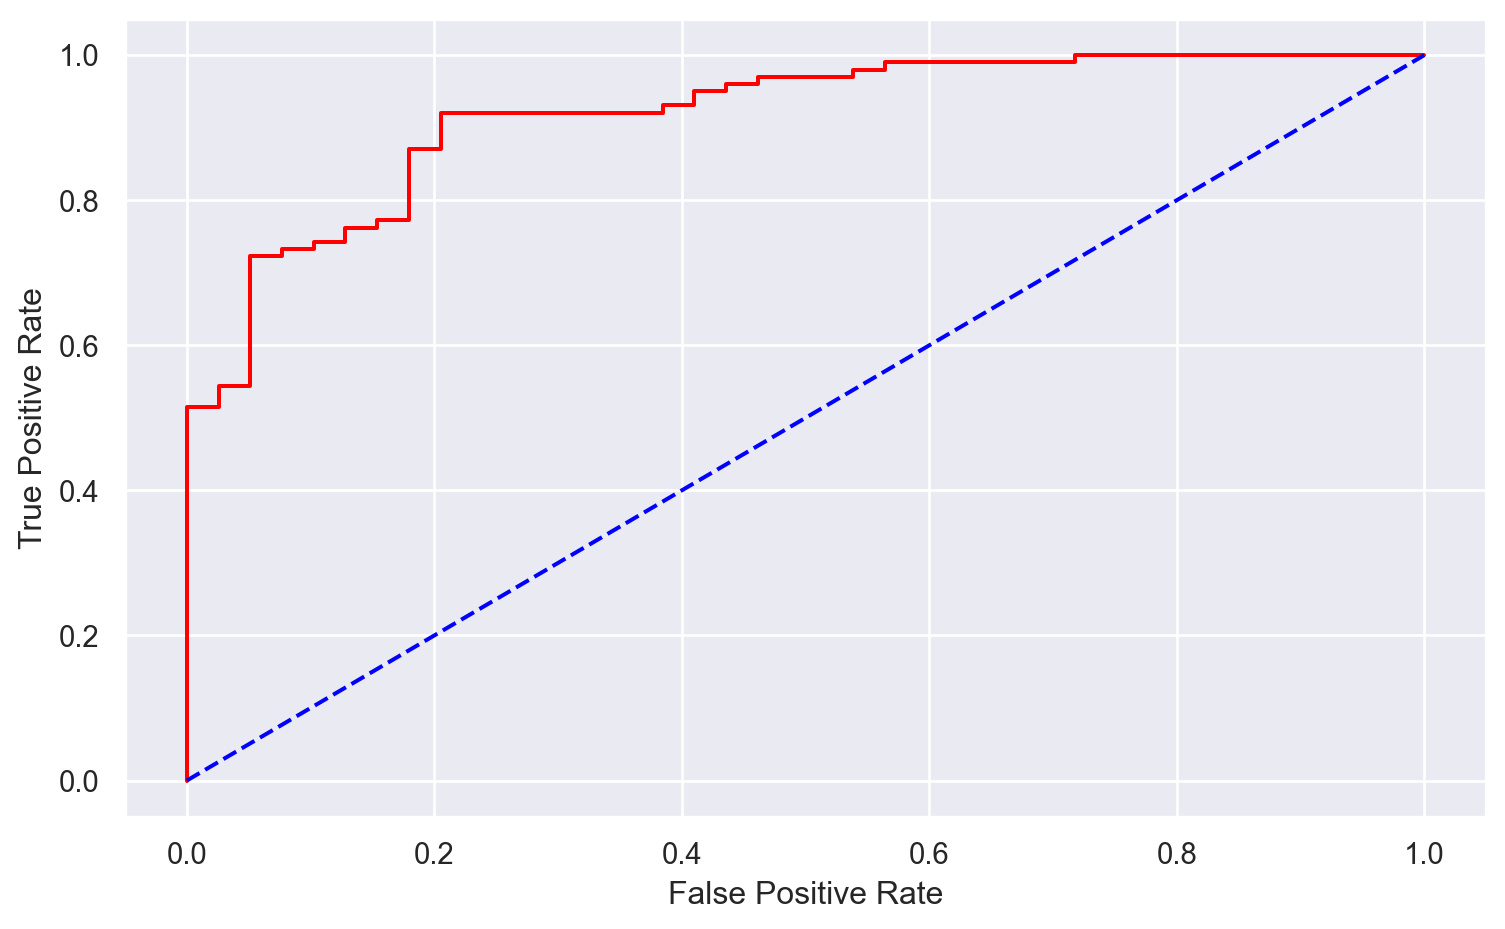

In [41]:
# ROC curve for logisitcs regression model
# Generate data for 45-degree line
noskill_probabilities = [0 for number in range(len(ytest))]


model = LogisticRegression(C=0.7,max_iter=1000)
model.fit(xtrain, ytrain)


# Predict probabilities for test set
probabilities_logistic_reg = model.predict_proba(xtest)


# Keep probabilities for only positive outcome
probabilities_logistic_posclass = probabilities_logistic_reg[:, 1]

# Calculate Data for Horizontal Line
falseposrate_noskill, trueposrate_noskill, _ = roc_curve(ytest, noskill_probabilities)

# Calculate Data for ROC Curve (Logistic Regression Model)
falseposrate_logistic, trueposrate_logistic, _ = roc_curve(ytest, probabilities_logistic_posclass)
# Use Seaborn Object to Plot ROC Curve
import seaborn as sns
import seaborn.objects as so
p = (so.Plot()
   .add(so.Line(color = 'red'),x =falseposrate_logistic, y = trueposrate_logistic)
   .add(so.Line(color = 'blue',linestyle = 'dashed'),x = falseposrate_noskill, y = trueposrate_noskill)
   .layout(size = (8,5))
)
p.label(x="False Positive Rate", y="True Positive Rate")


In [42]:
# Standard Scaler testing data
test_X =  test[['CHK_ACCT','DURATION','HISTORY','SAV_ACCT','AMOUNT','OTHER_INSTALL','EMPLOYMENT',
                 'NEW_CAR','PROP_UNKN_NONE','OWN_RES','RADIO/TV','USED_CAR','AGE','INSTALL_RATE',
                 'REAL_ESTATE' ,'RENT','FOREIGN','EDUCATION','MALE_MAR_or_WID','MALE_SINGLE','NUM_CREDITS','TELEPHONE',
                'GUARANTOR','CO-APPLICANT']]
test_X = pd.DataFrame(scaler.fit_transform(test_X), index = test_X.index, columns=test_X.columns)
print(test_X.head())

   CHK_ACCT  DURATION   HISTORY  SAV_ACCT    AMOUNT  OTHER_INSTALL  \
0  1.123300  0.502737 -1.437958  1.729799  1.376131       2.320125   
1  0.320943 -0.716635 -0.477184 -0.729631 -0.530611      -0.431011   
2 -0.481414  0.197894 -0.477184 -0.729631 -0.262069      -0.431011   
3 -1.283771  1.112423  1.444363 -0.729631  1.453453      -0.431011   
4  1.123300 -0.259371 -0.477184 -0.729631 -0.476068      -0.431011   

   EMPLOYMENT   NEW_CAR  PROP_UNKN_NONE   OWN_RES  ...  REAL_ESTATE      RENT  \
0   -1.133911 -0.546536       -0.457905 -1.515488  ...     1.539736  2.134375   
1   -0.306239 -0.546536       -0.457905 -1.515488  ...    -0.649462  2.134375   
2   -0.306239  1.829707       -0.457905 -1.515488  ...    -0.649462  2.134375   
3   -0.306239 -0.546536        2.183857  0.659854  ...    -0.649462 -0.468521   
4   -1.133911 -0.546536       -0.457905  0.659854  ...     1.539736 -0.468521   

    FOREIGN  EDUCATION  MALE_MAR_or_WID  MALE_SINGLE  NUM_CREDITS  TELEPHONE  \
0 -0.221249 

In [43]:
# Create our submission file for Kaggle Competition since Logistics Regression generate the best prediction
predictions = model.predict(test_X)
logistics_submission = pd.DataFrame({'OBS_ID': test['OBS_ID'], 'RESPONSE': predictions})
logistics_submission.to_csv('credit_submission_logistics_normalization_model__mix_selection17.csv', index=False)

In [44]:
#
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state = 0, n_estimators = 60,  max_features = "sqrt")
forest=forest.fit(xtrain, ytrain)
print(forest.score(xtest, ytest))
print(forest.score(xtrain, ytrain))

0.85
1.0


In [45]:
RF_prediction = forest.predict(xtest)
print(classification_report(ytest,RF_prediction))
print(confusion_matrix(ytest,RF_prediction))
print('precision: %.2f' % precision_score(ytest, RF_prediction,average='weighted'))
print('recall: %.2f' % recall_score(ytest,RF_prediction,average='weighted'))
print('f1_score: %.2f' % f1_score(ytest, RF_prediction,average='weighted'))

              precision    recall  f1-score   support

           0       0.85      0.56      0.68        39
           1       0.85      0.96      0.90       101

    accuracy                           0.85       140
   macro avg       0.85      0.76      0.79       140
weighted avg       0.85      0.85      0.84       140

[[22 17]
 [ 4 97]]
precision: 0.85
recall: 0.85
f1_score: 0.84


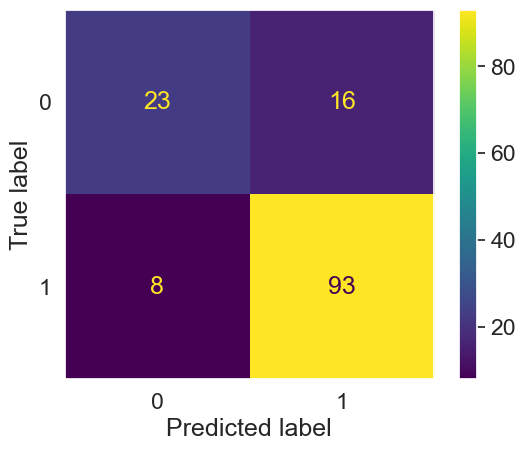

In [185]:
# Confusion Matrix for Random Forest
plt.rcParams["axes.grid"] = False
RF_matrix = confusion_matrix(ytest,RF_prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=RF_matrix)
disp.plot()
plt.show()

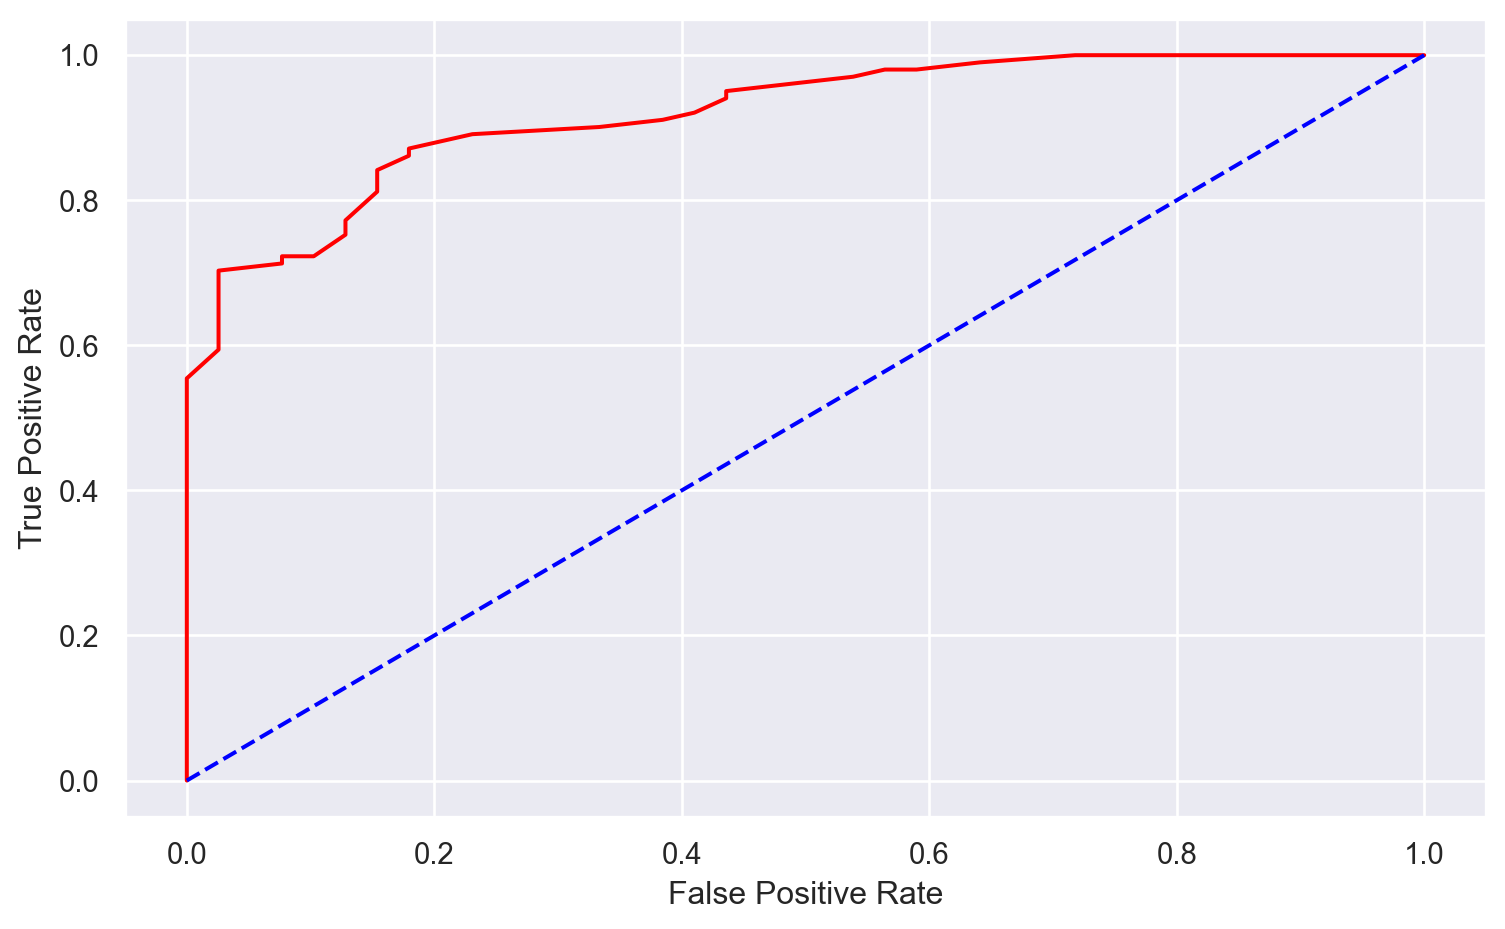

In [133]:
# ROC curve for Random Forest model
# Generate data for 45 degree line
forest_noskill_probabilities = [0 for number in range(len(ytest))]


forest = RandomForestClassifier(random_state = 0, n_estimators = 60,  max_features = "sqrt")
forest=forest.fit(xtrain, ytrain)


# Predict probabilities for test set
probabilities_forest_reg = forest.predict_proba(xtest)


#  Keep probabilities for only the positive outcome
probabilities_forest_posclass = probabilities_forest_reg[:, 1]

# Calculate data for horizontal line
forest_falseposrate_noskill, forest_trueposrate_noskill, _ = roc_curve(ytest, forest_noskill_probabilities)

# Calculate data for ROC Curve ( Random Forest)
falseposrate_forest, trueposrate_forest, _ = roc_curve(ytest, probabilities_forest_posclass)
# Use Seaborn Object to Plot ROC curve
import seaborn as sns
import seaborn.objects as so
p = (so.Plot()
   .add(so.Line(color = 'red'),x =falseposrate_forest, y = trueposrate_forest)
   .add(so.Line(color = 'blue',linestyle = 'dashed'),x = forest_falseposrate_noskill, y = forest_trueposrate_noskill)
   .layout(size = (8,5))
)
p.label(x="False Positive Rate", y="True Positive Rate")

In [134]:
# Decision Tree Classification
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state = 0, max_depth = 4)
clf.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [135]:
print(clf.score(xtest, ytest))
print(clf.score(xtrain, ytrain))

0.8142857142857143
0.7660714285714286


In [136]:
CLF_predictions = clf.predict(xtest)
print(classification_report(ytest,CLF_predictions))
print(confusion_matrix(ytest,CLF_predictions))
print('precision: %.2f' % precision_score(ytest, CLF_predictions,average='weighted'))
print('recall: %.2f' % recall_score(ytest,CLF_predictions,average='weighted'))
print('f1_score: %.2f' % f1_score(ytest, CLF_predictions,average='weighted'))

              precision    recall  f1-score   support

           0       0.76      0.49      0.59        39
           1       0.83      0.94      0.88       101

    accuracy                           0.81       140
   macro avg       0.79      0.71      0.74       140
weighted avg       0.81      0.81      0.80       140

[[19 20]
 [ 6 95]]
precision: 0.81
recall: 0.81
f1_score: 0.80


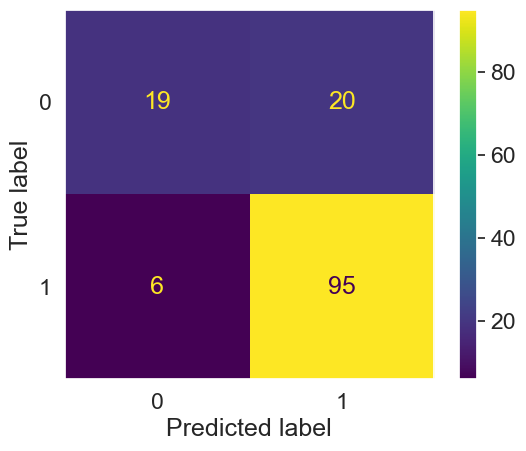

In [186]:
CLF_matrix = confusion_matrix(ytest,CLF_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=CLF_matrix)
disp.plot()
plt.show()

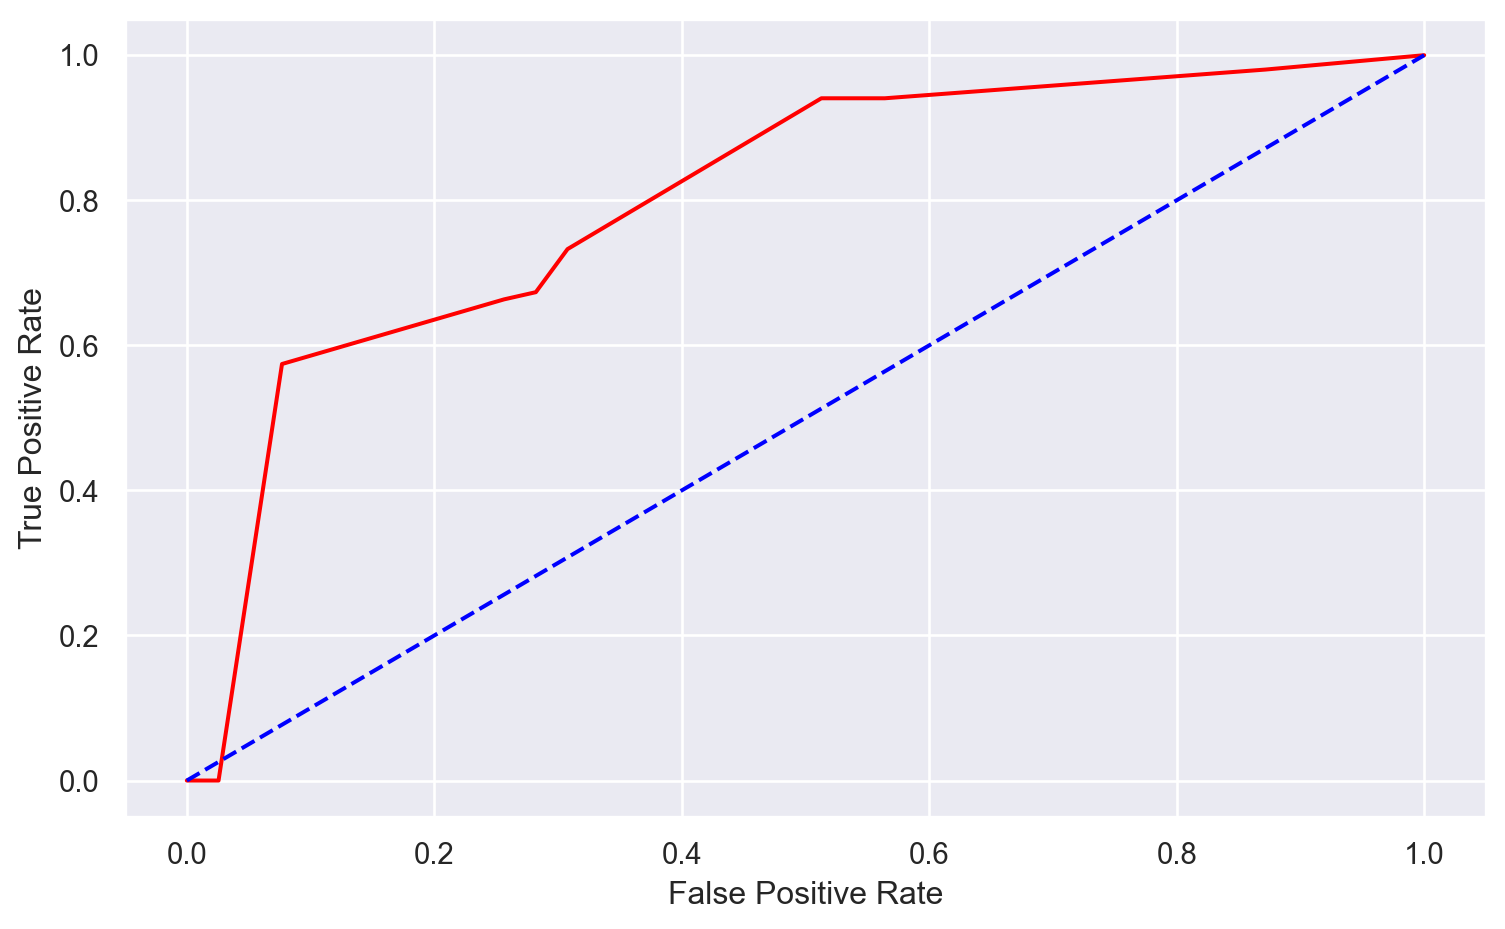

In [108]:
# ROC curve for Decision Tree model
# Generate data for 45 degree line
tree_noskill_probabilities = [0 for number in range(len(ytest))]


clf = DecisionTreeClassifier(random_state = 0, max_depth = 4)
clf.fit(xtrain,ytrain)


# Predict probability for test set
probabilities_tree_reg = clf.predict_proba(xtest)


# Keep probabilities for only positive value
probabilities_tree_posclass = probabilities_tree_reg[:, 1]

# Calculate data for horizontal line 
tree_falseposrate_noskill, tree_trueposrate_noskill, _ = roc_curve(ytest, tree_noskill_probabilities)

#  Calculate data for ROC cure(Decision Tree)
falseposrate_tree, trueposrate_tree, _ = roc_curve(ytest, probabilities_tree_posclass)
# Use Seaborn Object to plot ROC Curve
import seaborn as sns
import seaborn.objects as so
p = (so.Plot()
   .add(so.Line(color = 'red'),x =falseposrate_tree, y = trueposrate_tree)
   .add(so.Line(color = 'blue',linestyle = 'dashed'),x = tree_falseposrate_noskill, y = tree_trueposrate_noskill)
   .layout(size = (8,5))
)
p.label(x="False Positive Rate", y="True Positive Rate")